# Diagnosing Acute Inflammations of Bladder

## Abstract

This machine learning system can diagnose 2 acute inflammations of bladder. The medical dataset contains features and diagnoses of 2 diseases of the urinary system: **Inflammation of urinary bladder** and **nephritis of renal pelvis origin**. This medical dataset truly needs privacy! Because we cannot divulge the sexually-transmitted diseases of patients. So, what we learned about PySyft and OpenMined is applied in this project. Federated learning will protect the privacy of datasets in each hospital and at the same time, a more robust machine learning model will benefit all hospitals. Why? Because the machine learning model generated in this project is 100% accurate; whereas human doctors can commit mistakes when diagnosing these 2 diseases.

## DATASET

**Acute Inflammations Data Set <br/>
https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations**

<p align="center">
 <img src="images/bladder.jpg" title="Bladder">
</p>

Data Set Characteristics:  Multivariate<br/>
Attribute Characteristics: Categorical, Integer<br/>
Associated Tasks: Classification<br/>
Number of Instances: 120<br/>
Number of Attributes: 6<br/>
Number of Diagnoses: 2<br/>
Missing Values? No<br/>
Area: Life<br/>
Date Donated: 2009-02-11<br/>

## Source:

Jacek Czerniak, Ph.D., Assistant Professor<br/>
Systems Research Institute<br/>
Polish Academy of Sciences<br/>
Laboratory of Intelligent Systems<br/>
ul. Newelska 6, Room 218<br/>
01-447 Warszawa, Poland<br/>
e-mail: jacek.czerniak@ibspan.waw.pl or jczerniak@ukw.edu.pl <br/>

## Data Set Information:

The main idea of this data set is to prepare the algorithm of the expert 
system, which will perform the presumptive diagnosis of two diseases of 
urinary system. It will be the example of diagnosing of the acute 
inflammations of urinary bladder and acute nephritises. For better 
understanding of the problem, let us consider definitions of both 
diseases given by medics. 

**Acute inflammation of urinary bladder** is
characterised by sudden occurrence of pains in the abdomen region and 
the urination in form of constant urine pushing, micturition pains and 
sometimes lack of urine keeping. Temperature of the body is rising, 
however most often not above 38C. The excreted urine is turbid and 
sometimes bloody. At proper treatment, symptoms decay usually within 
several days. However, there is inclination to returns. At persons with 
acute inflammation of urinary bladder, we should expect that the illness 
will turn into protracted form.

**Acute nephritis of renal pelvis origin** occurs considerably more often at 
women than at men. It begins with sudden fever, which reaches, and 
sometimes exceeds 40C. The fever is accompanied by shivers and one- or 
both-side lumbar pains, which are sometimes very strong. Symptoms of 
acute inflammation of urinary bladder appear very often. Quite not 
infrequently there are nausea and vomiting and spread pains of whole 
abdomen.

The data was created by a medical expert as a data set to test the 
expert system, which will perform the presumptive diagnosis of two 
diseases of urinary system. Each instance (each line of the text file) represents an potential patient. The data is in an ASCII file. Attributes are separated by TAB. Each line 
of the data file starts with a digit which tells the temperature of patient.

## Attribute Example:

For example, '35,9 no no yes yes yes yes no'<br/>
<br/>
Where there are 6 features and 2 diagnoses (8 columns):<br/>
<br/>
**'35,9'** Temperature of patient<br/>
**'no'** Occurrence of nausea<br/>
**'no'** Lumbar pain<br/>
**'yes'** Urine pushing (continuous need for urination)<br/>
**'yes'** Micturition pains<br/>
**'yes'** Burning of urethra, itch, swelling of urethra outlet<br/>
<br/>
**'yes'** decision: Inflammation of urinary bladder<br/>
**'no'** decision: Nephritis of renal pelvis origin<br/>

## Attribute Information:

There are 6 features and 2 diagnoses (8 columns):

**a1** Temperature of patient { 35C-42C }<br/>
**a2** Occurrence of nausea { yes, no }<br/>
**a3** Lumbar pain { yes, no }<br/>
**a4** Urine pushing (continuous need for urination) { yes, no }<br/>
**a5** Micturition pains { yes, no }<br/>
**a6** Burning of urethra, itch, swelling of urethra outlet { yes, no }<br/>
<br/>
**d1** decision: Inflammation of urinary bladder { yes, no }<br/>
**d2** decision: Nephritis of renal pelvis origin { yes, no } <br/>

## Relevant Paper:

J.Czerniak, H.Zarzycki, Application of rough sets in the presumptive 
diagnosis of urinary system diseases, Artifical Inteligence and Security 
in Computing Systems, ACS'2002 9th International Conference Proceedings, 
Kluwer Academic Publishers,2003, pp. 41-51


# EXPLANATIONS OF SOURCE CODE

First, we need some functions to download the dataset, to read the dataset text file, and to parse the lines and fields of the dataset:

In [1]:
import urllib.request

def download_url(url, save_as):
    response = urllib.request.urlopen(url)
    data = response.read()
    file = open(save_as, 'wb')
    file.write(data)
    file.close()
    response.close()
    
def read_binary_file(file):
    f = open(file,'rb')
    block = f.read()
    return block.decode('utf-16')

def split_text_in_lines(text):
    return text.split('\r\n')

def split_by_tabs(line):
    return line.split('\t')

Then, we download the 2 files related to this dataset: diagnosis.names and diagnosis.data.

In [2]:
names_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.names'
data_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data'
diagnosis_names = 'diagnosis.names'
diagnosis_data = 'diagnosis.data'
download_url(names_link, diagnosis_names)
download_url(data_link, diagnosis_data)

We define some functions to parse the lines and fields of this dataset:

In [3]:
import numpy as np

def parse_double(field):
    field = field.replace(',', '.')
    return float(field)

def parse_boolean(field):
    return 1. if field == 'yes' else 0.

def read_np_array(file = diagnosis_data):
    text = read_binary_file(file)
    lines = split_text_in_lines(text)
    rows = []
    for line in lines:
        if line == '': continue
        line = line.replace('\r\n', '')
        fields = split_by_tabs(line)
        row = []
        j = 0
        for field in fields:
            value = parse_double(field) if j == 0 else parse_boolean(field)
            row.append(value)
            j += 1
        rows.append(row)
    matrix = np.array(rows, dtype = np.float32)
    return matrix


We define some functions in order to randomly split this dataset in 2: Training dataset (96 samples) and testing dataset (24 samples).

In [4]:
def get_random_indexes(n):
    indexes = list(range(n))
    random_indexes = []
    for i in range(n):
        r = np.random.randint(len(indexes))
        random_indexes.append(indexes.pop(r))
    return random_indexes

def get_indexes_for_2_datasets(n, training = 80):
    indexes = get_random_indexes(n)
    train = int(training / 100. * n)
    return indexes[:train], indexes[train:]

matrix = read_np_array()
n_samples, n_dimensions = matrix.shape

train_indexes, test_indexes = get_indexes_for_2_datasets(n_samples)
train_data = matrix[train_indexes]
test_data = matrix[test_indexes]

def print_dataset(name, data):
    print('Dataset {}. Shape: {}'.format(name, data.shape))
    print(data)

We print the training dataset. It has 96 samples (96 rows), and 6 features and 2 diagnoses (8 columns).

As we can see, the temperature is parsed into a real number. And the boolean values (yes or no) are parsed into real numbers as well: 1. and 0., respectively. 

In [5]:
print_dataset('Train', train_data)

Dataset Train. Shape: (96, 8)
[[40.4  1.   1.   0.   1.   0.   0.   1. ]
 [37.6  0.   0.   1.   1.   1.   1.   0. ]
 [41.1  0.   0.   0.   0.   0.   0.   0. ]
 [36.   0.   1.   0.   0.   0.   0.   0. ]
 [37.   0.   1.   0.   0.   0.   0.   0. ]
 [36.   0.   1.   0.   0.   0.   0.   0. ]
 [41.1  1.   1.   0.   1.   0.   0.   1. ]
 [37.5  0.   0.   1.   1.   1.   1.   0. ]
 [39.7  0.   1.   1.   0.   1.   0.   1. ]
 [41.2  1.   1.   0.   1.   0.   0.   1. ]
 [38.7  0.   1.   1.   0.   1.   0.   1. ]
 [40.   1.   1.   1.   1.   0.   1.   1. ]
 [41.5  1.   1.   0.   1.   0.   0.   1. ]
 [41.1  1.   1.   1.   1.   1.   1.   1. ]
 [37.3  0.   1.   0.   0.   0.   0.   0. ]
 [37.2  0.   1.   0.   0.   0.   0.   0. ]
 [37.1  0.   0.   1.   0.   0.   1.   0. ]
 [41.1  1.   1.   1.   1.   0.   1.   1. ]
 [36.2  0.   1.   0.   0.   0.   0.   0. ]
 [40.   1.   1.   0.   1.   0.   0.   1. ]
 [37.7  0.   0.   1.   0.   0.   1.   0. ]
 [37.7  0.   0.   1.   1.   0.   1.   0. ]
 [35.9  0.   1.   0.   0

We print the testing dataset. It has 24 samples (24 rows), and 6 features and 2 diagnoses (8 columns).

In [6]:
print_dataset('Test', test_data)

Dataset Test. Shape: (24, 8)
[[41.   1.   1.   1.   1.   1.   1.   1. ]
 [40.2  0.   0.   0.   0.   0.   0.   0. ]
 [37.1  0.   0.   1.   1.   1.   1.   0. ]
 [41.   0.   1.   1.   0.   1.   0.   1. ]
 [40.9  0.   1.   1.   0.   1.   0.   1. ]
 [36.   0.   0.   1.   1.   1.   1.   0. ]
 [38.   0.   1.   1.   0.   1.   0.   1. ]
 [37.   0.   0.   1.   0.   0.   1.   0. ]
 [37.6  0.   0.   1.   1.   0.   1.   0. ]
 [37.4  0.   1.   0.   0.   0.   0.   0. ]
 [40.7  1.   1.   1.   1.   0.   1.   1. ]
 [41.1  0.   1.   1.   0.   1.   0.   1. ]
 [37.2  0.   0.   1.   0.   0.   1.   0. ]
 [40.6  1.   1.   0.   1.   0.   0.   1. ]
 [40.   0.   0.   0.   0.   0.   0.   0. ]
 [36.6  0.   1.   0.   0.   0.   0.   0. ]
 [40.5  1.   1.   1.   1.   0.   1.   1. ]
 [38.   0.   1.   1.   0.   1.   0.   1. ]
 [38.5  0.   1.   1.   0.   1.   0.   1. ]
 [38.9  0.   1.   1.   0.   1.   0.   1. ]
 [40.   0.   0.   0.   0.   0.   0.   0. ]
 [37.8  0.   1.   0.   0.   0.   0.   0. ]
 [37.5  0.   0.   1.   0.

We define our machine learning model, which is a logistic regression model. Why? Because this medical dataset is linearly separable, which simplifies things a lot.

In [7]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

input_size = 6
learning_rate = 0.01
num_iterations = 20000

class LogisticRegression(torch.nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


We define some functions to train the machine learning model while keeping track of the training loss and the training accuracy.

In [8]:
def decide(y):
    return 1. if y >= 0.5 else 0.

decide_vectorized = np.vectorize(decide)

to_percent = lambda x: '{:.2f}%'.format(x)

def compute_accuracy(model, input, output):
    prediction = model(input).data.numpy()[:, 0]
    n_samples = prediction.shape[0] + 0.
    prediction = decide_vectorized(prediction)
    equal = prediction == output.data.numpy()
    return 100. * equal.sum() / n_samples

def get_input_and_output(data):
    input = Variable(torch.tensor(data[:, :6], dtype = torch.float32))
    output1 = Variable(torch.tensor(data[:, 6], dtype = torch.float32))
    output2 = Variable(torch.tensor(data[:, 7], dtype = torch.float32))
    return input, output1, output2

input, output1, output2 = get_input_and_output(train_data)
test_input, test_output1, test_output2 = get_input_and_output(test_data)

import matplotlib.pyplot as plt
%matplotlib inline

diagnosis_title1 = 'Inflammation of Urinary Bladder'
diagnosis_title2 = 'Nephritis of Renal Pelvis Origin'

def plot_graphs(diagnosis_title, losses, accuracies):
    plt.plot(losses)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    plt.plot(accuracies)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()
    
def train_model(diagnosis_title, input, output, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    losses = []
    accuracies = []
    n_samples, _ = input.shape
    for iteration in range(num_iterations):
            optimizer.zero_grad()
            prediction = model(input)
            loss = criterion(prediction, output)
            loss.backward()
            optimizer.step()
            if iteration % 500 == 0:
                train_acc = compute_accuracy(model, input, output)
                train_loss = loss.item()
                losses.append(train_loss)
                accuracies.append(train_acc)
                print('iteration={}, loss={:.4f}, train_acc={}'.format(iteration, train_loss, to_percent(train_acc)))
    plot_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


We actually train the machine learning model to diagnose the **Inflammation of Urinary Bladder**. As you can see in the graphs, the training loss drops quickly to almost zero and the training accuracy reaches the 100%. The testing accuracy is also 100%. Notice that this machine learning system diagnoses this disease in a perfect way; whereas human doctors can commit mistakes.

/home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([96])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


iteration=0, loss=3.0699, train_acc=47.92%
iteration=500, loss=1.5060, train_acc=47.92%
iteration=1000, loss=0.8915, train_acc=47.92%
iteration=1500, loss=0.2249, train_acc=92.71%
iteration=2000, loss=0.1799, train_acc=100.00%
iteration=2500, loss=0.1627, train_acc=100.00%
iteration=3000, loss=0.1487, train_acc=100.00%
iteration=3500, loss=0.1370, train_acc=100.00%
iteration=4000, loss=0.1270, train_acc=100.00%
iteration=4500, loss=0.1185, train_acc=100.00%
iteration=5000, loss=0.1111, train_acc=100.00%
iteration=5500, loss=0.1046, train_acc=100.00%
iteration=6000, loss=0.0988, train_acc=100.00%
iteration=6500, loss=0.0936, train_acc=100.00%
iteration=7000, loss=0.0890, train_acc=100.00%
iteration=7500, loss=0.0848, train_acc=100.00%
iteration=8000, loss=0.0810, train_acc=100.00%
iteration=8500, loss=0.0775, train_acc=100.00%
iteration=9000, loss=0.0743, train_acc=100.00%
iteration=9500, loss=0.0714, train_acc=100.00%
iteration=10000, loss=0.0687, train_acc=100.00%
iteration=10500, los

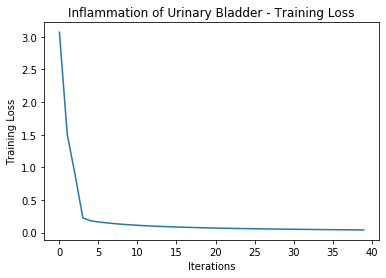

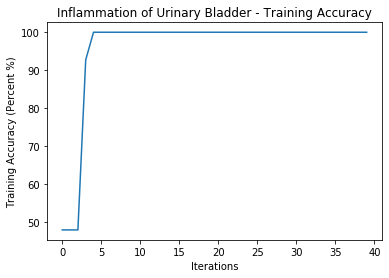


Testing Accuracy = 100.00%


In [9]:
model = train_model(diagnosis_title1, input, output1, test_input, test_output1)

We actually train the machine learning model to diagnose the **Nephritis of Renal Pelvis Origin**. As you can see in the graphs, the training loss drops quickly to almost zero and the training accuracy reaches the 100%. The testing accuracy is also 100%. Notice that this machine learning system diagnoses this disease in a perfect way; whereas human doctors can commit mistakes.

iteration=0, loss=2.6804, train_acc=69.79%
iteration=500, loss=0.8770, train_acc=60.42%
iteration=1000, loss=0.7597, train_acc=60.42%
iteration=1500, loss=0.5576, train_acc=60.42%
iteration=2000, loss=0.2603, train_acc=86.46%
iteration=2500, loss=0.2121, train_acc=100.00%
iteration=3000, loss=0.1941, train_acc=100.00%
iteration=3500, loss=0.1793, train_acc=100.00%
iteration=4000, loss=0.1668, train_acc=100.00%
iteration=4500, loss=0.1562, train_acc=100.00%
iteration=5000, loss=0.1470, train_acc=100.00%
iteration=5500, loss=0.1389, train_acc=100.00%
iteration=6000, loss=0.1317, train_acc=100.00%
iteration=6500, loss=0.1253, train_acc=100.00%
iteration=7000, loss=0.1195, train_acc=100.00%
iteration=7500, loss=0.1142, train_acc=100.00%
iteration=8000, loss=0.1094, train_acc=100.00%
iteration=8500, loss=0.1050, train_acc=100.00%
iteration=9000, loss=0.1010, train_acc=100.00%
iteration=9500, loss=0.0973, train_acc=100.00%
iteration=10000, loss=0.0938, train_acc=100.00%
iteration=10500, loss

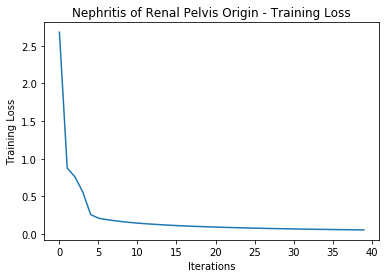

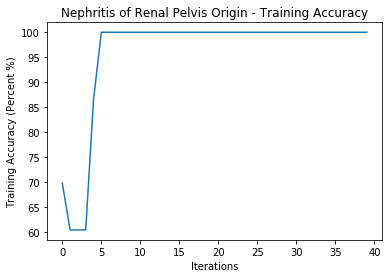


Testing Accuracy = 100.00%


In [10]:
model = train_model(diagnosis_title2, input, output2, test_input, test_output2)

So far, we have used machine learning in an insecure way. Now, let's implement the techniques of Secure and Private AI, the main topic of SPAIC.

# FEDERATED LEARNING WITH A TRUSTED AGGREGATOR

In this demo, there are 4 hospitals. (The dataset will be split in 4, randomly.) There could be more hospitals. The 4 hospitals cannot share the cases of their patients because they are competitors and it is necessary to protect the privacy of patients. Hence, the ML model will be learned in a federated way. 

How? Federated learning is iterated 1000 times. At each iteration, a copy of the shared model is sent to all the 4 hospitals. Each hospital trains its own local model with its own local dataset, in 5 local iterations. Each local model improves a little bit in its own direction. Then we compute the local losses and local accuracies to keep track of them and to make graphs of them. We send the local models to the trusted aggregator that will average all the model updates. This averaged model is the shared model that is sent to all the 4 hospitals at the begining of each iteration.

In this way, only the ML model will be shared. Whereas the local cases of each hospital will be kept private and they will be used to train model updates in a local way. Federated learning will protect the privacy of datasets in each hospital and at the same time, we will generate a more robust machine learning model, which will benefit all hospitals. This shared ML model preserves the privacy of individual patients and at the same time, reveals important statistics of stereotypical cases.

<p align="center">
 <img src="images/federated-learning.png">
</p>
<center>
 Federated Learning - Image taken from <a href="https://www.intel.ai/federated-learning-for-medical-imaging/">https://www.intel.ai/federated-learning-for-medical-imaging/</a>
</center>

First, we start by creating the virtual workers that simulate the computers of each hospital. And then we establish communications among all of them. 

In [11]:
import syft as sy
import torch as th
hook = sy.TorchHook(th)
from torch import nn, optim

n_hospitals = 4
hospitals = []
for i in range(n_hospitals):
    hospital_name = 'hospital{}'.format(i)
    hospital = sy.VirtualWorker(hook, id = hospital_name)
    hospitals.append(hospital)
secure_worker = sy.VirtualWorker(hook, id="secure_worker")

def get_workers_names(workers):
    return [worker.id for worker in workers]

def add_and_print_workers(worker, workers):
    print('workers of {} = {}'.format(worker.id, get_workers_names(workers)))
    worker.add_workers(workers)

for i in range(n_hospitals):
    workers = [hospitals[i2] for i2 in range(n_hospitals) if i2 != i] + [secure_worker]
    add_and_print_workers(hospitals[i], workers)
add_and_print_workers(secure_worker, hospitals)


W0820 16:43:40.943171 139625565148992 secure_random.py:26] Falling back to insecure randomness since the required custom op could not be found for the installed version of TensorFlow. Fix this by compiling custom ops. Missing file was '/home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/tf_encrypted/operations/secure_random/secure_random_module_tf_1.14.0.so'
W0820 16:43:40.992745 139625565148992 deprecation_wrapper.py:119] From /home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/tf_encrypted/session.py:26: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0820 16:43:41.857859 139625565148992 base.py:628] Worker hospital1 already exists. Replacing old worker which could cause                     unexpected behavior
W0820 16:43:41.858496 139625565148992 base.py:628] Worker hospital2 already exists. Replacing old worker which could cause                     unexpected behavior
W0820 16:43:41.859091 139625565148992 base.py:628] 

workers of hospital0 = ['hospital1', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital1 = ['hospital0', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital2 = ['hospital0', 'hospital1', 'hospital3', 'secure_worker']
workers of hospital3 = ['hospital0', 'hospital1', 'hospital2', 'secure_worker']
workers of secure_worker = ['hospital0', 'hospital1', 'hospital2', 'hospital3']


Each virtual worker in each hospital is supposed to have some cases of patients, their own local datasets. The 4 hospitals cannot share the cases of their patients because they are competitors and it is necessary to protect the privacy of patients. So, the local cases of each hospital will be kept private and they will be used to train model updates in a local way.

In order to simulate this process, we start by dividing the dataset in 4 parts, randomly. And then we send each part to each hospital. Each part is composed of the features, the diagnosis for disease 1, and the diagnosis for disease 2.

In [12]:
n_samples = train_data.shape[0]
samples_per_hospital = int((n_samples + 0.5) / n_hospitals)
hospital_features = []
hospital_targets1 = []
hospital_targets2 = []
train_data = th.tensor(train_data, dtype = torch.float32, requires_grad=True)
for i in range(n_hospitals):
    train_data2 = train_data[i * samples_per_hospital:(i + 1) * samples_per_hospital].clone().detach().requires_grad_(True)
    features = train_data2[:, :6].clone().detach().requires_grad_(True)
    targets1 = train_data2[:, 6][:, None].clone().detach() 
    targets2 = train_data2[:, 7][:, None].clone().detach() 
    hospital_features.append(features.send(hospitals[i]))
    hospital_targets1.append(targets1.send(hospitals[i]))
    hospital_targets2.append(targets2.send(hospitals[i]))

print(model)

LogisticRegression(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)


We define some functions to train the machine learning model in a federated way while keeping track of the training loss and the training accuracy, for each hospital separately.

The whole process is done in a trusted aggregator, in 1000 iterations. (We can vary the number of iterations.) At each iteration, a copy of the shared model is sent to all the 4 hospitals. Each hospital trains its own local model with its own local dataset, in 5 local iterations. (We can vary the number of local iterations.) Each local model improves a little bit in its own direction. Then we compute the local losses and local accuracies to keep track of them. So, we will able to create graphs of the learning curves: **Training Losses versus Iterations** and **Training Accuracies versus Iterations**. We send the local models to the trusted aggregator that will average all the model updates. This averaged model is the shared model that is sent to all the 4 hospitals at the begining of each iteration.

Finally, we compute the testing accuracy of the final model with the testing dataset we separated since the beginning.

In [13]:
def plot_federated_graphs(diagnosis_title, losses, accuracies):
    for i in range(n_hospitals):
        plt.plot(losses[i], label=f'Hospital {i}')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    for i in range(n_hospitals):
        plt.plot(accuracies[i], label=f'Hospital {i}')
    legend = plt.legend(loc='lower right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()
    
def compute_federated_accuracy(model, input, output):
    prediction = model(input)
    n_samples = prediction.shape[0]
    s = 0.
    for i in range(n_samples):
        p = 1. if prediction[i] >= 0.5 else 0.
        e = 1. if p == output[i] else 0.
        s += e
    return 100. * s / n_samples

iterations = 1000 #2000
worker_iterations = 5

def federated_learning(diagnosis_title, hospital_features, hospital_targets, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    losses = [[] for i in range(n_hospitals)]
    accuracies = [[] for i in range(n_hospitals)]
    for iteration in range(iterations):
        models = [model.copy().send(hospitals[i]) for i in range(n_hospitals)]
        optimizers = [torch.optim.SGD(params = models[i].parameters(), lr = learning_rate) for i in range(n_hospitals)]
        for worker_iteration in range(worker_iterations):
            last_losses = []
            for i in range(n_hospitals):
                optimizers[i].zero_grad()
                prediction = models[i](hospital_features[i])
                loss = criterion(prediction, hospital_targets[i])
                loss.backward()
                optimizers[i].step()
                loss = loss.get().data.item()
                last_losses.append(loss)
        for i in range(n_hospitals):
            losses[i].append(last_losses[i])
            train_acc = compute_federated_accuracy(models[i], hospital_features[i], hospital_targets[i])
            accuracies[i].append(train_acc)
            models[i].move(secure_worker)
        with th.no_grad():
            avg_weight = sum([models[i].linear.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.bias.set_(avg_bias.get())
        if iteration % 100 == 0:
            losses_str = ['{:.4f}'.format(losses[i][-1]) for i in range(n_hospitals)]
            accuracies_str = [to_percent(accuracies[i][-1]) for i in range(n_hospitals)]
            print('Iteration={}, losses={}, accuracies={}'.format(iteration, losses_str, accuracies_str))
    plot_federated_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


We actually train the machine learning model to diagnose the **Inflammation of Urinary Bladder**, in a federated way. As you can see in the graphs, the training losses of each hospital drop quickly to almost zero and the training accuracies of each hospital reach the 100%. The testing accuracy is also 100%. Notice that this machine learning system diagnoses this disease in a perfect way; whereas human doctors can commit mistakes.

/home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Iteration=0, losses=['0.9096', '0.8328', '1.9309', '1.3678'], accuracies=['37.50%', '33.33%', '50.00%', '54.17%']
Iteration=100, losses=['0.9181', '0.4144', '1.5114', '1.1034'], accuracies=['37.50%', '91.67%', '50.00%', '54.17%']
Iteration=200, losses=['0.8108', '0.4497', '1.0155', '0.8722'], accuracies=['66.67%', '66.67%', '50.00%', '54.17%']
Iteration=300, losses=['0.3383', '0.3264', '0.3469', '0.4698'], accuracies=['79.17%', '70.83%', '83.33%', '75.00%']
Iteration=400, losses=['0.2006', '0.1812', '0.1624', '0.2024'], accuracies=['95.83%', '100.00%', '100.00%', '100.00%']
Iteration=500, losses=['0.1804', '0.1632', '0.1447', '0.1817'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=600, losses=['0.1647', '0.1488', '0.1309', '0.1655'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=700, losses=['0.1518', '0.1369', '0.1197', '0.1523'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=800, losses=['0.1409', '0.1270', '0.1103', '0.141

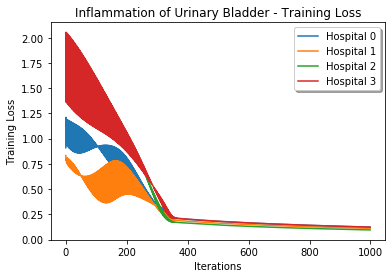

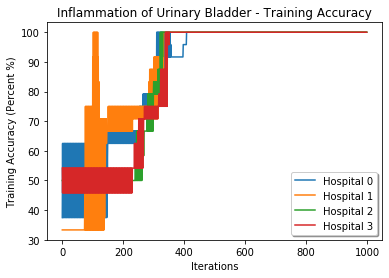


Testing Accuracy = 100.00%


In [14]:
model = federated_learning(diagnosis_title1, hospital_features, hospital_targets1, test_input, test_output1)

We actually train the machine learning model to diagnose the **Nephritis of Renal Pelvis Origin**, in a federated way. As you can see in the graphs, the training losses of each hospital drop quickly to almost zero and the training accuracies of each hospital reach the 100%. The testing accuracy is also 100%. Notice that this machine learning system diagnoses this disease in a perfect way; whereas human doctors can commit mistakes.

Iteration=0, losses=['1.9586', '1.0755', '1.1401', '1.9368'], accuracies=['41.67%', '37.50%', '37.50%', '41.67%']
Iteration=100, losses=['1.7387', '1.5665', '1.5511', '1.7416'], accuracies=['41.67%', '37.50%', '37.50%', '41.67%']
Iteration=200, losses=['1.3884', '1.1495', '1.1017', '1.4136'], accuracies=['41.67%', '45.83%', '54.17%', '41.67%']
Iteration=300, losses=['1.0380', '0.6462', '0.5630', '1.0771'], accuracies=['54.17%', '66.67%', '66.67%', '41.67%']
Iteration=400, losses=['0.6920', '0.2910', '0.2020', '0.7449'], accuracies=['58.33%', '95.83%', '100.00%', '62.50%']
Iteration=500, losses=['0.2535', '0.1947', '0.1616', '0.3370'], accuracies=['100.00%', '100.00%', '100.00%', '79.17%']
Iteration=600, losses=['0.2098', '0.1723', '0.1495', '0.2196'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=700, losses=['0.1957', '0.1590', '0.1395', '0.2021'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=800, losses=['0.1841', '0.1476', '0.1309', '0.1877']

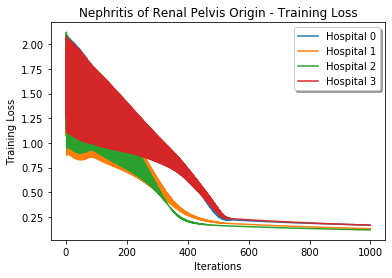

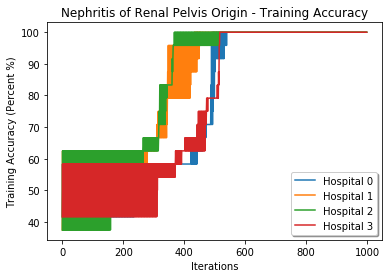


Testing Accuracy = 100.00%


In [15]:
model = federated_learning(diagnosis_title2, hospital_features, hospital_targets2, test_input, test_output2)

The learning curves **Training Losses versus Iterations** and **Training Accuracies versus Iterations** have 4 colors for all 4 hospitals. Each graph has 4 curves of different colors: Blue, orange, green, and red. The curves are not lines; they are rather regions. Why? Because each iteration of federated learning is complex: First, 5 local iterations in each virtual worker (each hospital) to train each local model. Each local model improves a little bit in its own direction. Then, the 4 different models are sent to the trusted aggregator that averages them. Finally, the averaged model is sent back to the 4 hospitals. Such averaged model can have lower performance in comparison to the local models, which are more locally adapted to the local datasets. That's why the progress in the learning curves goes back and forth. Moreover, the graph has 1000 iterations. That's why the curves becomes regions. Because the curves go back and forth too often and are quite dense.

## Thanks for your time!
I hope you have enjoyed the explanations of this machine learning system with federated learning.